<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

### Внимание
Я изменила чтение таким образом, чтобы пропускаи в данных считались за NaN

In [4]:
data = pd.read_csv('./train.csv', na_values=['', ' '])

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2798,1,99.75,99.75,Male,0,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4931,29,94.65,2649.15,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3503,72,97.25,7133.10,Male,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),0
3789,4,74.40,299.70,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1
2115,7,58.85,465.70,Male,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,0


In [5]:
# Посмотрите на случайные строчки
data.iloc[np.random.choice(data.shape[0], 7)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4912,5,55.80,300.40,Female,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic),0
1074,4,49.25,208.45,Male,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,0
950,16,71.40,1212.10,Male,0,No,No,Yes,Yes,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0
210,64,73.05,4688.65,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
1604,66,45.55,3027.25,Female,1,Yes,No,No,No phone service,DSL,No,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),0
1124,54,104.30,5278.15,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1203,2,19.85,51.60,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


In [6]:
# null значения есть в колонке TotalSpent
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
# заменяем пропуски линейной интерполяцией. В целом не так важен метод, т.к. пропусков всего 9
data.interpolate(inplace=True)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

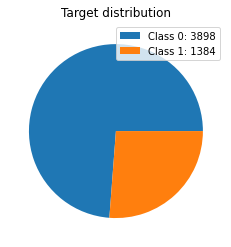

In [8]:
# классы несбалансированы
target_counts = data[target_col].value_counts()
plt.pie(target_counts)
plt.title('Target distribution')
plt.legend([f"Class 0: {target_counts[0]}", f"Class 1: {target_counts[1]}"]);

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [9]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [10]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col])

In [12]:
model = make_pipeline(
    LabelEncoder(),
    OneHotEncoder(),
    StandardScaler(),
    LogisticRegression()
)

In [13]:
model

Pipeline(steps=[('labelencoder', LabelEncoder()),
                ('onehotencoder', OneHotEncoder()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [14]:
params = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
              'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
              'logisticregression__solver': ['saga'],
              'logisticregression__max_iter': [1000]
              }
best_lr = GridSearchCV(model, param_grid=params,scoring='roc_auc', refit=True)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [15]:
best_lr.fit(X_train, y_train)

/home/user/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/user/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/user/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/user/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/user/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/home/user/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_t

TypeError: fit_transform() takes 2 positional arguments but 3 were given

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [16]:
!pip install catboost

In [17]:
# Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col])

model = CatBoostClassifier()
model.fit(X_train, y_train, cat_features=cat_cols, silent=True);

In [18]:
y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7157009334834411

In [19]:
# Протестируйте разные значения параметров количества деревьев и learning_rate'а 
# и выберите лучшую по метрике ROC-AUC комбинацию. 
parameters = {'learning_rate': [0.01, 0.03, 0.05],
        'num_trees': [10, 25, 50, 100, 120, 150]
        }
model = CatBoostClassifier(cat_features=cat_cols, random_seed=42)
gs = GridSearchCV(estimator=model, param_grid = parameters, cv = 10, n_jobs=-1, scoring='roc_auc')
gs.fit(X_train, y_train)

0:	learn: 0.6754506	total: 2.78ms	remaining: 415ms
1:	learn: 0.6588353	total: 5.49ms	remaining: 406ms
2:	learn: 0.6434201	total: 8.62ms	remaining: 422ms
3:	learn: 0.6288506	total: 11.1ms	remaining: 406ms
4:	learn: 0.6172808	total: 12.8ms	remaining: 370ms
5:	learn: 0.6052560	total: 15.2ms	remaining: 364ms
6:	learn: 0.5936474	total: 16.5ms	remaining: 337ms
7:	learn: 0.5833641	total: 17.8ms	remaining: 316ms
8:	learn: 0.5736132	total: 19.5ms	remaining: 306ms
9:	learn: 0.5643469	total: 20.8ms	remaining: 291ms
10:	learn: 0.5561782	total: 22ms	remaining: 278ms
11:	learn: 0.5486278	total: 23.3ms	remaining: 268ms
12:	learn: 0.5412122	total: 24.5ms	remaining: 258ms
13:	learn: 0.5341459	total: 25.8ms	remaining: 250ms
14:	learn: 0.5274047	total: 27.2ms	remaining: 245ms
15:	learn: 0.5215809	total: 28.5ms	remaining: 239ms
16:	learn: 0.5160898	total: 30ms	remaining: 235ms
17:	learn: 0.5104691	total: 31.2ms	remaining: 229ms
18:	learn: 0.5057758	total: 32.5ms	remaining: 224ms
19:	learn: 0.5006597	total

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fde29876490>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.05],
                         'num_trees': [10, 25, 50, 100, 120, 150]},
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [20]:
print('Best params:', *gs.best_params_)
print('Best score', gs.best_score_)

Best params: learning_rate num_trees
Best score 0.8452226022705375


# Предсказания

In [21]:
best_model = gs.best_estimator_

In [22]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.